In [1]:
# =========================
#
# Titel : HPC Game Of Life
# Author: Dimitri Dening
# Date  : 29.06.2021
#
# =========================

from IPython.display import display
import matplotlib.pyplot as plt
import contextlib
import pandas as pd
import numpy as np
import json
import csv
import os

In [2]:
%matplotlib inline

### Seriell (Referenz vs. Optimiert)

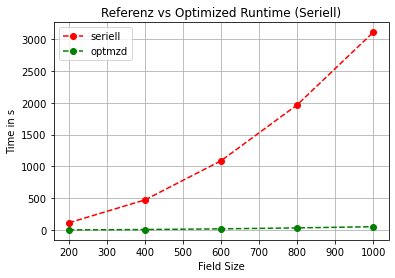

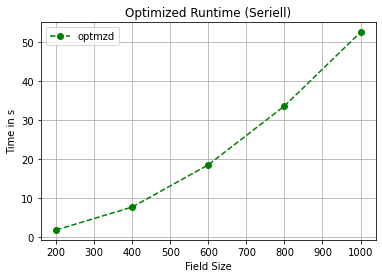

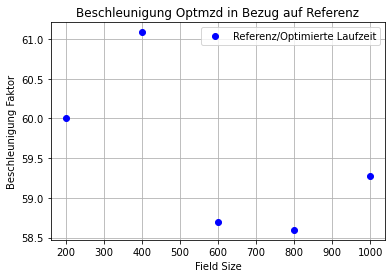

In [2]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time_ser = []
    time_opt = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #                  Messdaten Seriell
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('seriell_2021')]
        
        if not files:
            break
            
        file_accumulate_ser = sub_data_set + '/accumulated_seriell.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_ser)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_ser, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #                  Messdaten Optimiert
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('optmzd_2021')]
        
        if not files:
            break
            
        file_accumulate_opt = sub_data_set + '/accumulated_optmzd.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_opt)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_opt, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
        
        # =====================================================
        #
        #                  Mittelwert bestimmen
        #
        # =====================================================
        files_ser = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_seriell.csv')]
        files_opt = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_optmzd.csv')]
        
        if not files_ser or not files_opt:
            break
            
        file_accumulate_ser_mean = sub_data_set + '/accumulated_seriell.csv'
        file_accumulate_opt_mean = sub_data_set + '/accumulated_optmzd.csv'
        df_ser = pd.read_csv(file_accumulate_ser_mean, names=('method', 'threads', 'frames', 'size', 'time'))
        df_opt = pd.read_csv(file_accumulate_opt_mean, names=('method', 'threads', 'frames', 'size', 'time'))       
        df_time_ser = pd.DataFrame(df_ser, columns=['time'])
        df_time_opt = pd.DataFrame(df_opt, columns=['time'])          
        time_ser.append(np.array(df_time_ser.values.tolist()))
        time_opt.append(np.array(df_time_opt.values.tolist()))
              
    if time_ser:
        t_mean = np.mean(time_ser, axis=0)
        t_std = np.std(time_ser, axis=0, ddof=1)

        filename_ser = data_set + '/seriell_data.csv'
        with open(filename_ser, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_ser)):
                data = []
                data.append(df_ser['method'].values[idx])
                data.append(df_ser['threads'].values[idx])
                data.append(df_ser['frames'].values[idx])
                data.append(df_ser['size'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
                
    if time_opt:
        t_mean = np.mean(time_opt, axis=0)
        t_std = np.std(time_opt, axis=0, ddof=1)

        filename_opt = data_set + '/optmzd_data.csv'
        with open(filename_opt, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_opt)):
                data = []
                data.append(df_opt['method'].values[idx])
                data.append(df_opt['threads'].values[idx])
                data.append(df_opt['frames'].values[idx])
                data.append(df_opt['size'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
           
        # =====================================================
        #
        #            Plots (Seriell vs Optimiert) 
        #
        # =====================================================
        
        df_ser_mean = pd.read_csv(filename_ser, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        df_opt_mean = pd.read_csv(filename_opt, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))  
        
        method_ser = df_ser_mean['method'][0]
        method_opt = df_opt_mean['method'][0]
        
        ax = df_ser_mean.plot(x='ssize', y='t_mean', style="ro--", label=method_ser) # kind='scatter'
        df_opt_mean.plot(x='ssize', y='t_mean', style="go--", ax=ax, label=method_opt)
        
        # plt.errorbar(df_ser_mean['size'], df_ser_mean['t_mean'], yerr=df_ser_mean['t_std'], fmt=' ', color='red', ecolor='black', elinewidth=1, capsize=5, label="std deviation comm")
        # plt.errorbar(df_opt_mean['size'], df_opt_mean['t_mean'], yerr=df_opt_mean['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5, label="std deviation calc")
        
        plt.legend(loc="best")
        plt.title("Referenz vs Optimized Runtime (Seriell)")
        plt.xlabel("Field Size")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show()
        
        # Plotte nur Optimized
        df_opt_mean.plot(x='ssize', y='t_mean', style="go--", label=method_opt)
        plt.legend(loc="best")
        plt.title("Optimized Runtime (Seriell)")
        plt.xlabel("Field Size")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show()
        
        # Speedup
        a = pd.DataFrame(df_ser_mean, columns=['ssize', 't_mean']) 
        b = pd.DataFrame(df_opt_mean, columns=['ssize', 't_mean']) 
        b['t_mean'] = a['t_mean']/b['t_mean']
        
        b.plot(x='ssize', y='t_mean', style="bo", grid=True, label='Referenz/Optimierte Laufzeit')
        plt.legend(loc="best")
        plt.title("Beschleunigung Optmzd in Bezug auf Referenz")
        plt.xlabel("Field Size")
        plt.ylabel("Beschleunigung Faktor")

### Referenz MPI

,method,threads,frames,ssize,t_mean
0,prl-ref,2,20000,1600,76.757703
9,prl-ref,4,20000,1600,38.124638
10,prl-ref,6,20000,1600,25.219469
11,prl-ref,8,20000,1600,18.967208
12,prl-ref,10,20000,1600,15.185795
13,prl-ref,12,20000,1600,12.607406
14,prl-ref,14,20000,1600,10.791218
15,prl-ref,16,20000,1600,9.424983
16,prl-ref,18,20000,1600,8.374713
1,prl-ref,20,20000,1600,7.621869


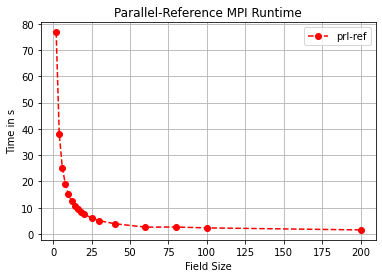

In [3]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time_ser = []
    time_opt = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #                  Messdaten Parallel Referenz
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('prl-ref_')]
        
        if not files:
            break
            
        file_accumulate_prl_ref = sub_data_set + '/accumulated_prl_ref.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_prl_ref)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_prl_ref, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
           
        # =====================================================
        #
        #            Plots (Parallel Referenz) 
        #
        # =====================================================
        
        df_prl_ref = pd.read_csv(file_accumulate_prl_ref, names=('method', 'threads', 'frames', 'ssize', 't_mean')) 
        df_prl_ref = df_prl_ref.sort_values(by='threads')
        display(df_prl_ref)
        
        method_prl_ref = df_prl_ref['method'][0]
        df_prl_ref.plot(x='threads', y='t_mean', style="ro--", label=method_prl_ref) # kind='scatter'
        
        plt.legend(loc="best")
        plt.title("Parallel-Reference MPI Runtime")
        plt.xlabel("Field Size")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show()

### Messdaten von Comm and Calc umformatieren

In [4]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        # Calc Data
        files_calc = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_calc')]
          
        if not files_calc:
            break
        
        for filename in files_calc:
            file_dir = sub_data_set + "\\" + filename
            # reading the data from the file
            with open(file_dir, 'r') as f:
                current_data = f.read()
                with open(file_dir, 'w') as over_write:
                    current_data = current_data.replace(" ", ",")
                    over_write.write(current_data)
          
        # Comm Data
        files_comm = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_comm')]
        
        if not files_comm:
            break
        
        for filename in files_comm:
            file_dir = sub_data_set + "\\" + filename
            # reading the data from the file
            with open(file_dir, 'r') as f:
                current_data = f.read()
                with open(file_dir, 'w') as over_write:
                    current_data = current_data.replace(" ", ",")
                    over_write.write(current_data)       

### Zusammenführen von Messdaten (Distributed)

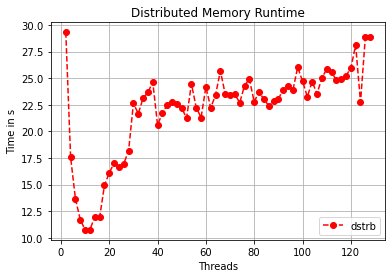

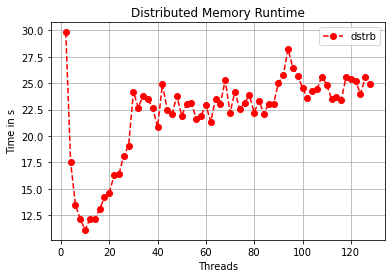

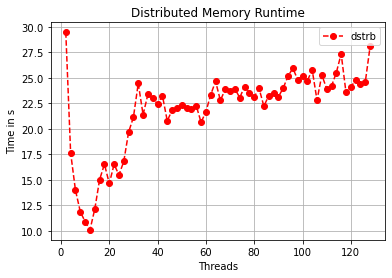

In [8]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_2021')]
        
        if not files:
            break
            
        file_accumulate = sub_data_set + '/accumulated_dstrb.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
          
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
            
                # write the data
                writer.writerow(data)
            
        df = pd.read_csv(file_accumulate, names=('method', 'threads', 'frames', 'size', 'time'))
        # df = pd.DataFrame(df, columns=['threads', 'time']) 
        # display(df)   
        
        method = df['method'][0]
        df.plot(x='threads', y='time', style="ro--", label=method) # kind='scatter'
        plt.legend(loc="best")
        plt.title("Distributed Memory Runtime")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show() 

### Zusammenführen von Comm und Calc Messungen (Distributed)

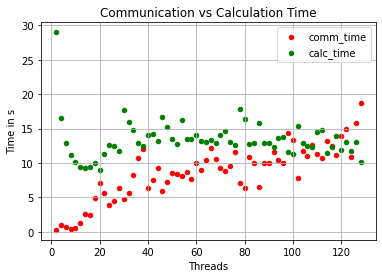

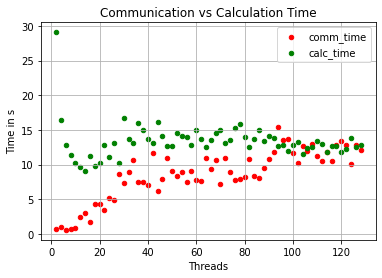

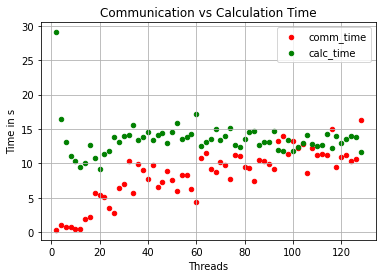

In [5]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #          Messdaten Comm Time (Distributed)
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_comm')]
        
        if not files:
            break
            
        file_accumulate_comm = sub_data_set + '/accumulated_dstrb_comm.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_comm)
          
        header = ['time', 'threads']
        
        with open(file_accumulate_comm, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                data.append(current_data[:-1])
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #       Messdaten Calculation Time (Distributed) 
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_calc')]
        
        if not files:
            break
            
        file_accumulate_calc = sub_data_set + '/accumulated_dstrb_calc.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_calc)
          
        header = ['time', 'threads']
        
        with open(file_accumulate_calc, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                data.append(current_data[:-1])
                # write the data
                writer.writerow(data)
           
        # =====================================================
        #
        #       Plots Comm & Calculation Time (Distributed) 
        #
        # =====================================================
        df_comm = pd.read_csv(file_accumulate_comm, names=('time', 'threads'))
        df_comm = pd.DataFrame(df_comm, columns=['time', 'threads']) 
        
        df_calc = pd.read_csv(file_accumulate_calc, names=('time', 'threads'))
        df_calc = pd.DataFrame(df_calc, columns=['time', 'threads']) 
        
        # ax = df_comm.plot(x='threads', y='time', style="ro--", label='comm_time');      
        # df_calc.plot(x='threads', y='time', style="go--", ax = ax, label='calc_time');
        
        ax = df_comm.plot.scatter(x="threads", y="time", color="Red", label="comm_time")
        df_calc.plot.scatter(x="threads", y="time", color="Green", label="calc_time", ax=ax);

        plt.legend(loc="best")
        plt.title("Communication vs Calculation Time")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        plt.grid()
        plt.show()  

### Zusammenführen von allen Messdaten (Distributed)

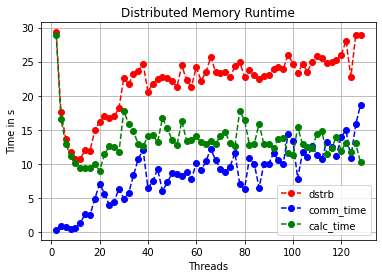

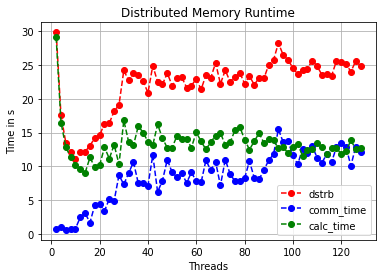

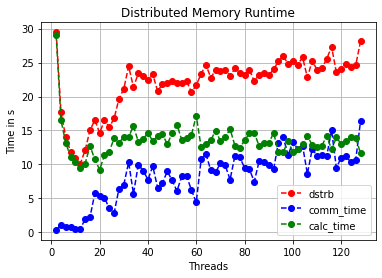

In [6]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        # =====================================================
        #
        #                Messdaten Distributed
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_2021')]
        
        if not files:
            break
            
        file_accumulate_dstrb = sub_data_set + '/accumulated_dstrb.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_dstrb)
          
        header = ['method', 'threads', 'frames', 'size', 'time']
        
        with open(file_accumulate_dstrb, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                # reconstructing the data as a dictionary
                js = json.loads(current_data)
                data.append(js.get("method"))
                data.append(int(js.get("threads")))
                data.append(js.get("frames")) 
                data.append(js.get("size"))
                data.append(float(js.get("time")))
                # write the data
                writer.writerow(data)
            
        # df = pd.read_csv(file_accumulate_dstrb, names=('method', 'threads', 'frames', 'size', 'time'))
        # df = pd.DataFrame(df, columns=['threads', 'time']) 
        # display(df) 
        
        # =====================================================
        #
        #          Messdaten Comm Time (Distributed)
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_comm')]
        
        if not files:
            break
            
        file_accumulate_comm = sub_data_set + '/accumulated_dstrb_comm.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_comm)
          
        header = ['time', 'threads']
        
        with open(file_accumulate_comm, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                data.append(current_data[:-1])
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #       Messdaten Calculation Time (Distributed) 
        #
        # =====================================================
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('dstrb_calc')]
        
        if not files:
            break
            
        file_accumulate_calc = sub_data_set + '/accumulated_dstrb_calc.csv'
    
        with contextlib.suppress(FileNotFoundError):
            os.remove(file_accumulate_calc)
          
        header = ['time', 'threads']
        
        with open(file_accumulate_calc, 'w', encoding='UTF8', newline='\n') as f:
            writer = csv.writer(f, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
            # write the header
            # writer.writerow(header)
                
            for filename in files:
                data = []         
                file_dir = sub_data_set + "\\" + filename
            
                # reading the data from the file
                with open(file_dir) as f:
                    current_data = f.read()
            
                data.append(current_data[:-1])
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #                 Plots (Distributed) 
        #
        # =====================================================
        
        df_dstrb = pd.read_csv(file_accumulate_dstrb, names=('method', 'threads', 'frames', 'size', 'time'))
        df_comm = pd.read_csv(file_accumulate_comm, names=('time', 'threads'))
        df_calc = pd.read_csv(file_accumulate_calc, names=('time', 'threads'))
        # display(df)   
        
        method = df_dstrb['method'][0]
        ax = df_dstrb.plot(x='threads', y='time', style="ro--", label=method) # kind='scatter'
        fx = df_comm.plot(x='threads', y='time', style="bo--", ax=ax, label='comm_time')
        df_calc.plot(x='threads', y='time', style="go--", ax=fx, label='calc_time')
        
        
        plt.legend(loc="best")
        plt.title("Distributed Memory Runtime")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show() 

### Mittelwert Distributed

,threads,t_mean,t_std
0,2,29.538531,0.261679
1,4,17.573992,0.066010
2,6,13.701774,0.251917
3,8,11.900217,0.208886
4,10,10.913973,0.187921
...,...,...,...
59,120,25.140531,0.960019
60,122,26.025514,1.808814
61,124,23.707490,0.862465
62,126,26.343209,2.228704


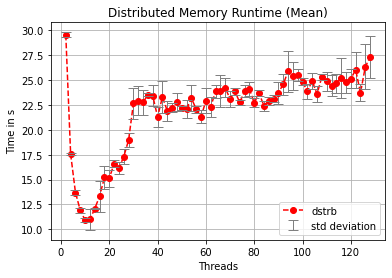

In [7]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        files = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_dstrb.csv')]
        
        if not files:
            break
            
        file_accumulate_dstrb = sub_data_set + '/accumulated_dstrb.csv'

        df = pd.read_csv(file_accumulate_dstrb, names=('method', 'threads', 'frames', 'size', 'time'))
        df_time = pd.DataFrame(df, columns=['time'])
        time.append(np.array(df_time.values.tolist()))
        
    if time:
        t_mean = np.mean(time, axis=0)
        t_std = np.std(time, axis=0, ddof=1)

        filename = data_set + '/dstrb_data.csv'
        with open(filename, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df)):
                data = []
                data.append(df['method'].values[idx])
                data.append(df['threads'].values[idx])
                data.append(df['frames'].values[idx])
                data.append(df['size'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
                
        # =====================================================
        #
        #                 Plots (Distributed) 
        #
        # =====================================================
        
        df_mean = pd.read_csv(filename, names=('method', 'threads', 'frames', 'size', 't_mean', 't_std'))
        df_sub = pd.DataFrame(df_mean, columns=['threads', 't_mean', 't_std']) 
        display(df_sub)
        
        method = df_mean['method'][0]
        df_mean.plot(x='threads', y='t_mean', style="ro--", label=method) # kind='scatter' , yerr='t_std', capsize=4, rot=0
        plt.errorbar(df_mean['threads'], df_mean['t_mean'], yerr=df_mean['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5, label="std deviation")
        plt.legend(loc="best")
        plt.title("Distributed Memory Runtime (Mean)")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        # plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
        plt.grid()
        plt.show() 

### Mittelwert Comm und Calculation Time (Distributed)

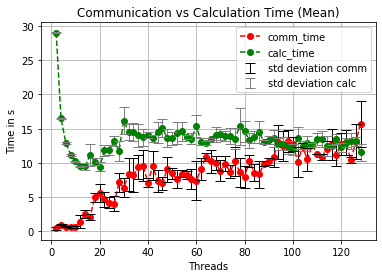

In [8]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

for index, data_set in enumerate(data_sets):
    time_comm = []
    time_calc = []
    sub_data_sets = [folder.path for folder in os.scandir(data_set) if folder.is_dir()]
    
    for sub_data_set in sub_data_sets:
        
        files_comm = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_dstrb_comm')]
        files_calc = [filename for filename in os.listdir(sub_data_set) if filename.startswith('accumulated_dstrb_calc')]
        
        if not files_comm or not files_calc:
            break
            
        file_accumulate_comm = sub_data_set + '/accumulated_dstrb_comm.csv'
        file_accumulate_calc = sub_data_set + '/accumulated_dstrb_calc.csv'
        df_comm = pd.read_csv(file_accumulate_comm, names=('time', 'threads'))
        df_calc = pd.read_csv(file_accumulate_calc, names=('time', 'threads'))      
        df_time_comm = pd.DataFrame(df_comm, columns=['time'])
        df_time_calc = pd.DataFrame(df_calc, columns=['time'])     
        time_comm.append(np.array(df_time_comm.values.tolist()))
        time_calc.append(np.array(df_time_calc.values.tolist()))
        
    if time_comm:
        t_mean = np.mean(time_comm, axis=0)
        t_std = np.std(time_comm, axis=0, ddof=1)

        filename_comm = data_set + '/dstrb_data_comm.csv'
        with open(filename_comm, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_comm)):
                data = []
                data.append(df_comm['threads'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
                
    if time_calc:
        t_mean = np.mean(time_calc, axis=0)
        t_std = np.std(time_calc, axis=0, ddof=1)

        filename_calc = data_set + '/dstrb_data_calc.csv'
        with open(filename_calc, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
    
            for idx in range(len(df_calc)):
                data = []
                data.append(df_calc['threads'].values[idx])
                data.append(t_mean[idx][0])
                data.append(t_std[idx][0])
                # write the data
                writer.writerow(data)
      
        # =====================================================
        #
        #       Plots Comm & Calculation Time (Mean) 
        #
        # =====================================================
        df_comm_mean = pd.read_csv(filename_comm, names=('threads', 't_mean', 't_std'))
        df_comm_mean = pd.DataFrame(df_comm_mean, columns=['threads', 't_mean', 't_std']) 
        
        df_calc_mean = pd.read_csv(filename_calc, names=('threads', 't_mean', 't_std'))
        df_calc_mean = pd.DataFrame(df_calc_mean, columns=['threads', 't_mean', 't_std']) 
        
        ax = df_comm_mean.plot(x='threads', y='t_mean', style="ro--", label='comm_time');    
        df_calc_mean.plot(x='threads', y='t_mean', style="go--", ax = ax, label='calc_time');
        
        # ax = df_comm_mean.plot.scatter(x="threads", y="t_mean", color="Blue", label="comm_time")
        # df_calc_mean.plot.scatter(x="threads", y="t_mean", color="Red", label="calc_time", ax=ax);
        
        plt.errorbar(df_comm_mean['threads'], df_comm_mean['t_mean'], yerr=df_comm_mean['t_std'], fmt=' ', color='red', ecolor='black', elinewidth=1, capsize=5, label="std deviation comm")
        plt.errorbar(df_calc_mean['threads'], df_calc_mean['t_mean'], yerr=df_calc_mean['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5, label="std deviation calc")

        plt.legend(loc="best")
        plt.title("Communication vs Calculation Time (Mean)")
        plt.xlabel("Threads")
        plt.ylabel("Time in s")
        plt.grid()
        plt.show()

### Auswertung Distributed (Mean)

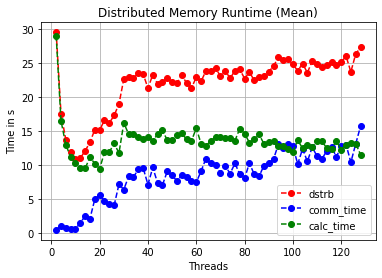

In [9]:
# =====================================================
#
#                 Plots (Distributed) 
#
# =====================================================
        
#df_dstrb = pd.read_csv(file_accumulate_dstrb, names=('method', 'threads', 'frames', 'size', 'time'))
#df_comm = pd.read_csv(file_accumulate_comm, names=('time', 'threads'))
#df_calc = pd.read_csv(file_accumulate_calc, names=('time', 'threads'))  
        
method = df_mean['method'][0]
ax = df_mean.plot(x='threads', y='t_mean', style="ro--", label=method) # kind='scatter'
fx = df_comm_mean.plot(x='threads', y='t_mean', style="bo--", ax=ax, label='comm_time')
df_calc_mean.plot(x='threads', y='t_mean', style="go--", ax=fx, label='calc_time')

plt.legend(loc="best")
plt.title("Distributed Memory Runtime (Mean)")
plt.xlabel("Threads")
plt.ylabel("Time in s")
# plt.savefig('dstr-dataset-%s.png' % str(index), bbox_inches='tight')
plt.grid()
plt.show() 

### Speedup

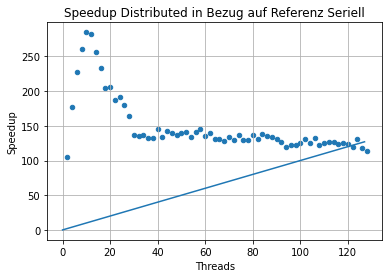

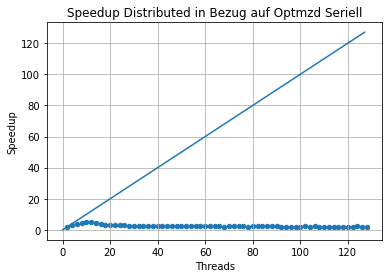

In [10]:
data_dir = '../rawdata/data/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

p_exists = False
s_exists = False

for index, data_set in enumerate(data_sets):
    
    try:
        file_dir_dstrb = data_set + '/dstrb_data.csv'     
        data_dstrb = pd.read_csv(file_dir_dstrb, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        p_exists = True
        #display(data_dstrb)
    except:
        pass
        
    try:
        file_dir_ser = data_set + '/seriell_data.csv'
        file_dir_opt = data_set + '/optmzd_data.csv'
        
        data_seriell = pd.read_csv(file_dir_ser, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        data_optmzd = pd.read_csv(file_dir_opt, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        s_exists = True 
        
        # display(data_seriell)
        # display(data_optmzd)
     
    except:
        pass
    
if p_exists and s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    my_dstrb = pd.DataFrame(data_dstrb, columns=['threads', 'size', 't_mean']) 

    my_dstrb['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/my_dstrb['t_mean']
    my_dstrb.plot(x='threads', y='t_mean', kind='scatter', grid=True)
    plt.plot(np.arange(128), np.arange(128))
    plt.title("Speedup Distributed in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")

    my_dstrb = pd.DataFrame(data_dstrb, columns=['threads', 'size', 't_mean']) 
    my_dstrb['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/my_dstrb['t_mean']
    my_dstrb.plot(x='threads', y='t_mean', kind='scatter', grid=True)
    plt.plot(np.arange(128), np.arange(128))
    # plt.legend(loc="best")
    plt.title("Speedup Distributed in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")